In [1]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns



In [2]:
# Get Data

data = pd.read_csv('C:/Users/Mohammad Amin Roohi/Desktop/data.csv')

data

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400000
1,2,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125000
2,3,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125000
3,4,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125000
4,5,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250000
5,6,Opération séduction,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:30:00,2016-08-29 11:00:00,2,Opération séduction,NaN,Reality Programs,No,Yes,No,No,2.7,18.250000
6,7,Tic tac show,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 11:00:00,2016-08-29 11:30:00,2,Tic tac show,NaN,Game Shows,No,Yes,No,No,2.3,19.200000
7,8,Révolution,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 11:30:00,2016-08-29 12:30:00,4,Révolution,NaN,Ongoing Dramatic Series,No,Yes,No,No,1.4,19.550000
8,9,CSI: Miami,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 12:30:00,2016-08-29 13:30:00,4,CSI: Miami,NaN,Ongoing Dramatic Series,No,Yes,No,No,7.5,20.437500
9,10,CSI: Miami,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 13:30:00,2016-08-29 14:30:00,4,CSI: Miami,NaN,Ongoing Dramatic Series,No,Yes,No,No,12.1,21.400000


In [96]:
data.describe(include='object')

,Episode,Station,Channel Type,Season,Date,Day of week,Start_time,End_time,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?
count,616613,616613,616613,616613,616613,616613,616613,616613,616613,394049,616613,616613,616613,616613,616613
unique,6687,24,2,4,877,7,138321,138333,6687,86555,27,2,2,2,2
top,Complément de programme canadien,Teletoon Fr.+,Specialty Channel,Fall,2018-02-07,Wednesday,2018-02-09 02:00:00,2018-09-21 23:00:00,Complément de programme canadien,(P),Animated Television Programs & Films,No,Yes,No,No
freq,9413,50746,535913,234291,840,89726,27,32,9413,13093,88876,599428,605960,610326,568803


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616613 entries, 0 to 616655
Data columns (total 21 columns):
Unnamed: 0                                616613 non-null int64
Episode                                   616613 non-null object
Station                                   616613 non-null object
Channel Type                              616613 non-null object
Season                                    616613 non-null object
Year                                      616613 non-null int64
Date                                      616613 non-null object
Day of week                               616613 non-null object
Start_time                                616613 non-null object
End_time                                  616613 non-null object
Length                                    616613 non-null int64
Name of show                              616613 non-null object
Name of episode                           394049 non-null object
Genre                                     61661

In [ ]:
# fill NA for Temperature---for this I used mean temp grouped by Season


data['Temperature in Montreal during episode'] = data.groupby('Season').transform(lambda x: x.fillna(x.mean()))


In [58]:
# Add Duration of Films as a Feature

data['Film_duration'] = (pd.to_datetime(data.End_time) - pd.to_datetime(data.Start_time)).astype('timedelta64[m]')



43

In [72]:
# fill NA for Temperature---for this I used mean temp grouped by Season

data['Temperature in Montreal during episode'] = data.groupby('Season')['Temperature in Montreal during episode'].transform(lambda x: x.fillna(x.mean()))


In [79]:
# Omit rows that contain NA in End_time

data = data[~data.End_time.isna()]



In [93]:
# Extract Month and Day of Dates

data['Day_of_Month'] = pd.DatetimeIndex(data.Start_time).day
data['Month'] = pd.DatetimeIndex(data.Start_time).month


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0         29
1         29
2         29
3         29
4         29
5         29
6         29
7         29
8         29
9         29
10        29
11        29
12        29
13        29
14        29
15        29
16        29
17        29
18        29
19        29
20        29
21        29
22        29
23        29
24        29
25        29
26        29
27        29
28        29
29        29
          ..
616626    22
616627    22
616628    22
616629    22
616630    22
616631    22
616632    22
616633    22
616634    22
616635    22
616636    22
616637    22
616638    22
616639    22
616640    22
616641    22
616642    22
616643    22
616644    22
616645    22
616646    22
616647    22
616648    22
616649    22
616650    22
616651    22
616652    22
616653    22
616654    22
616655    22
Name: Day_of_Month, Length: 616613, dtype: int64

In [3]:
X_numerical = data.select_dtypes(exclude='object')
X_categorical = data.select_dtypes(include='object')
y = X_numerical['Market Share_total']
X_numerical = X_numerical.drop(['Market Share_total' , 'Unnamed: 0'], axis = 1)




In [85]:
pd.to_datetime(data.Start_time[0]).to_pydatetime().day



#t.to_pydatetime()

29

In [65]:
a = data.groupby('Season')['Temperature in Montreal during episode'].transform(lambda x: x.fillna(x.mean()))


0

In [71]:
a[75871]

-4.8768754349742665

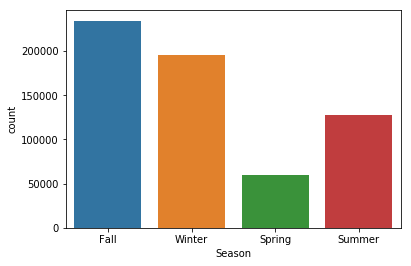

In [4]:
sns.countplot(data.Season)


